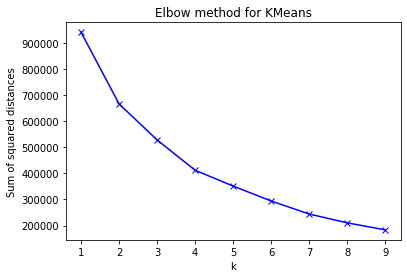

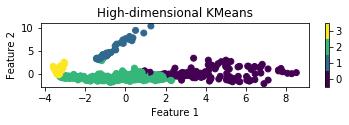

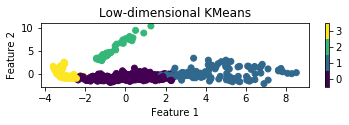

In [42]:
from sklearn.cluster import KMeans
from make_df import *
from pca import *
import matplotlib.pyplot as plt
#Get the search dataset
search = make_search_df()
#Fill Nans with zeros
search_new = search.reset_index().fillna(0)
#Search dataset
X = search_new.values[:,2:].astype(float)
#PCA reduced data
_,_,_,X_reduced = calc_pca(search)




#To find the most optimal value of K in Kmeans using the Elbow method 
ssd = []
#Take 10 clusters
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k,random_state=0)
    km = km.fit(X)
    ssd.append(km.inertia_)
plt.title("Elbow method for KMeans")    
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.show()

#The optimal value of K is 4 given by the elbow method
#High dimensional K-means
kmeans_high = KMeans(n_clusters=4, random_state=0)
kmeans_high.fit(X)
y_pred_high = kmeans_high.predict(X)

#Low dimensional K-means
kmeans_low = KMeans(n_clusters=4, random_state=0)
kmeans_low.fit(X_reduced)
y_pred_low = kmeans_low.predict(X_reduced)


#Plot for high-dimensional Kmeans
plt.subplot(3,1,1)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred_high, cmap=plt.cm.get_cmap('viridis',4))
plt.colorbar(ticks=[0,1,2,3])
plt.clim(-0.5,3.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("High-dimensional KMeans")
plt.show()


#Plot for low-dimensional Kmeans
plt.subplot(3,1,2)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_pred_low, cmap=plt.cm.get_cmap('viridis',4))
plt.colorbar(ticks=[0,1,2,3])
plt.clim(-0.5,3.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Low-dimensional KMeans")
plt.show()